In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import importlib

import interpolation_runner as ip
import file_handler as fh

In [2]:
#--SETUP: ---------------------------------------------------------------------------------
epsilons = np.linspace(-100, 100, 10)
lamdas = np.linspace(0,1,12)
T_L = 10
T_R = 1

if T_L > T_R:
    T_COLD = T_R
    T_HOT = T_L

INPUT = {
    'omega': 0.105,
    'u_intra': 500,
    'u_inter': 300,
    'V_B': 50,
    'gammaL': 0.1,
    'gammaR': 0.105,
    'T_L': T_L,
    'T_R': T_R,
}
       


In [3]:

I, I_var, J_QH, P, eff, sigma, TUR = ip.run_interpolation(epsilons, lamdas, **INPUT)

c:\temp_prog\interpolation_runner.py:49: UserWarning: Warning! Negative noise! -485169.89863986184 for lambda: 1.0 and epsilon: -100.0
 (I = -0.15315567102980845, J_QH = 11.486661273010927)
  warnings.warn(f"Warning! Negative noise! {i_var} for lambda: {lmda} and epsilon: {eps}\n (I = {i}, J_QH = {j_qh})")
c:\temp_prog\interpolation_runner.py:49: UserWarning: Warning! Negative noise! -6894048033.667898 for lambda: 1.0 and epsilon: -55.55555555555556
 (I = -0.11337378248309135, J_QH = 3.464198907802923)
  warnings.warn(f"Warning! Negative noise! {i_var} for lambda: {lmda} and epsilon: {eps}\n (I = {i}, J_QH = {j_qh})")


In [4]:
importlib.reload(fh)
fh.save_file(I, I_var, J_QH, P, eff, sigma, TUR, epsilons, lamdas, INPUT)


No epsilon R!
Existing one: (720, 18)
combined one one: (840, 18)
After dropping duplicates: (840, 18)


In [5]:
'''
# Read the CSV file into a DataFrame
df = pd.read_csv('results.csv')

# Find the minimum TUR value
min_tur_value = df['TUR'].min()

# Filter the DataFrame for all rows with the lowest TUR value
min_tur_rows = df[df['TUR'] == min_tur_value]

print(min_tur_rows)
'''

# Read the CSV file into a DataFrame
df = pd.read_csv('latest_results.csv')
# Get the 10 lowest TUR values
lowest_tur_rows = df.nsmallest(20, 'TUR')

print(lowest_tur_rows)


     epsilon_L  epsilon_R    lambda        TUR         I     I_var      J_QH  \
116  33.333333  33.333333  1.000000   2.713633  0.000600  0.000651  0.035003   
6    33.333333  33.333333  0.000000   2.935306  0.000221  0.000259  0.012873   
16   33.333333  33.333333  0.090909   2.948376  0.000215  0.000252  0.012549   
96   33.333333  33.333333  0.818182   2.948399  0.000439  0.000514  0.025608   
106  33.333333  33.333333  0.909091   2.949303  0.000494  0.000581  0.028844   
86   33.333333  33.333333  0.727273   2.953917  0.000382  0.000447  0.022322   
26   33.333333  33.333333  0.181818   2.958923  0.000214  0.000250  0.012498   
76   33.333333  33.333333  0.636364   2.960239  0.000330  0.000385  0.019254   
66   33.333333  33.333333  0.545455   2.965847  0.000286  0.000333  0.016678   
36   33.333333  33.333333  0.272727   2.966200  0.000219  0.000255  0.012780   
56   33.333333  33.333333  0.454545   2.969386  0.000253  0.000294  0.014757   
46   33.333333  33.333333  0.363636   2.

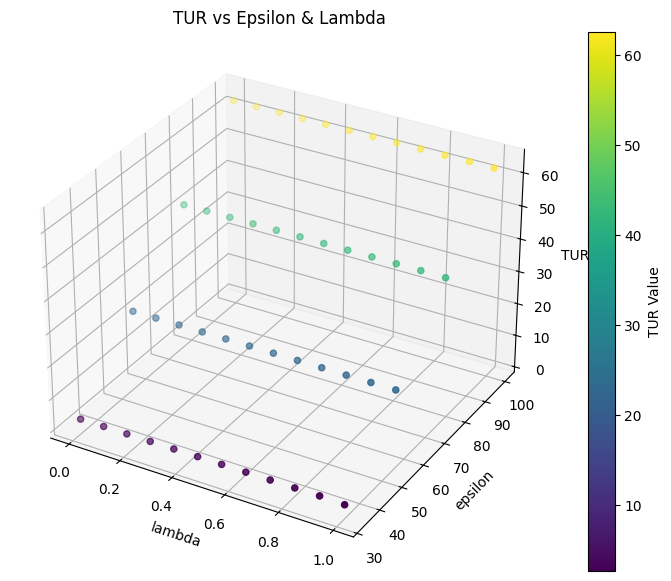

In [7]:
#Plotting from dataframe

# Create 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
sc = ax.scatter(df['lambda'], df['epsilon_L'], df['TUR'], c=df['TUR'], cmap='viridis')

# Labels
ax.set_xlabel('lambda')
ax.set_ylabel('epsilon')
ax.set_zlabel('TUR')

# Add color bar
plt.colorbar(sc, label="TUR Value")

plt.title("TUR vs Epsilon & Lambda")
plt.show()

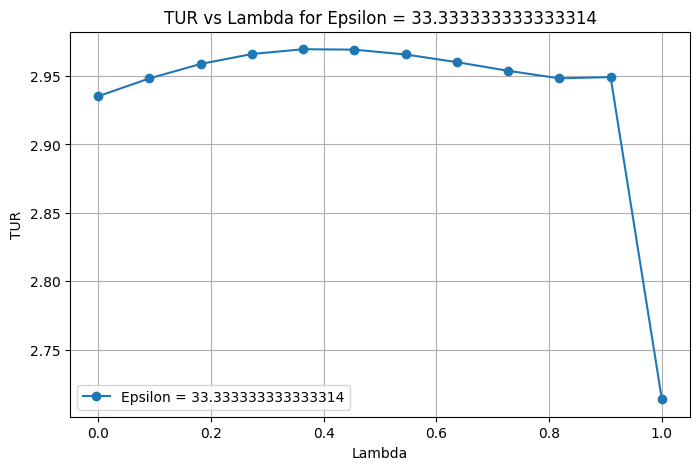

In [8]:
# Remove rows where TUR is NaN
df_clean = df.dropna(subset=['TUR'])

# Find the lowest epsilon where TUR is not NaN
min_epsilon_with_tur = df_clean['epsilon_L'].min()

# Filter the DataFrame for this lowest epsilon
df_filtered = df_clean[df_clean['epsilon_L'] == min_epsilon_with_tur]

# Plot TUR vs lambda for the lowest epsilon with TUR values
plt.figure(figsize=(8, 5))
plt.plot(df_filtered['lambda'], df_filtered['TUR'], marker='o', linestyle='-', label=f"Epsilon = {min_epsilon_with_tur}")

# Labels and title
plt.xlabel("Lambda")
plt.ylabel("TUR")
plt.title(f"TUR vs Lambda for Epsilon = {min_epsilon_with_tur}")
plt.legend()
plt.grid()

# Show plot
plt.show()

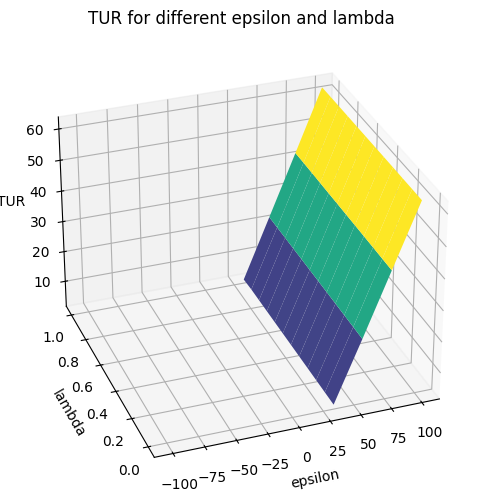

In [9]:
#3D - plot

Epsilon, Lamda = np.meshgrid(epsilons, lamdas)    # Create a 2D grid

# Plot the surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Epsilon, Lamda, TUR, cmap='viridis')

# Labels
ax.set_xlabel('epsilon')
ax.set_ylabel('lambda')
ax.set_zlabel('TUR')
ax.set_title('TUR for different epsilon and lambda')
#ax.set_xlim(160, 200)
##ax.set_zlim(0, 200)
#ax.view_init(elev=-90, azim=120)
ax.view_init(azim=-110)

plt.show()

# Create interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=TUR, x=Epsilon, y=Lamda, colorscale="viridis")])

# Labels
fig.update_layout(
    title="TUR for different epsilon and lambda",
    scene=dict(
        xaxis_title="epsilon",
        yaxis_title="lambda",
        zaxis_title="TUR"
        #xaxis=dict(title="epsilon", range=[160, 200]),  # X-axis limits
        #yaxis=dict(title="lambda", range=[0, 1]),  # Y-axis limits
        #zaxis=dict(title="T", range=[0, 200])  # Z-axis remains auto-scaled
    )
)

# Show the interactive plot
fig.show()



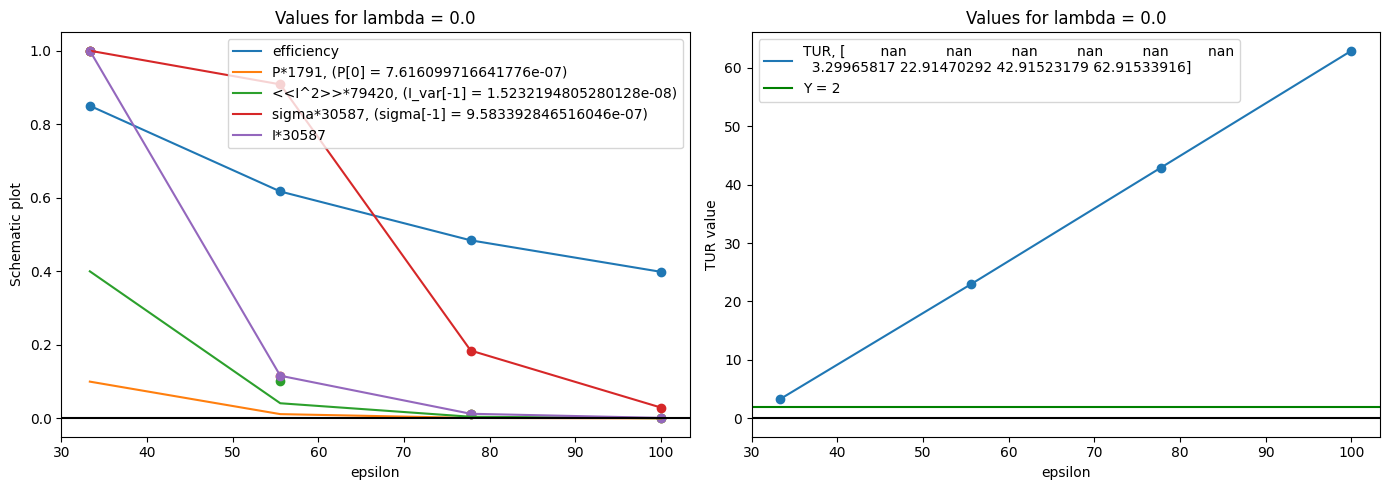

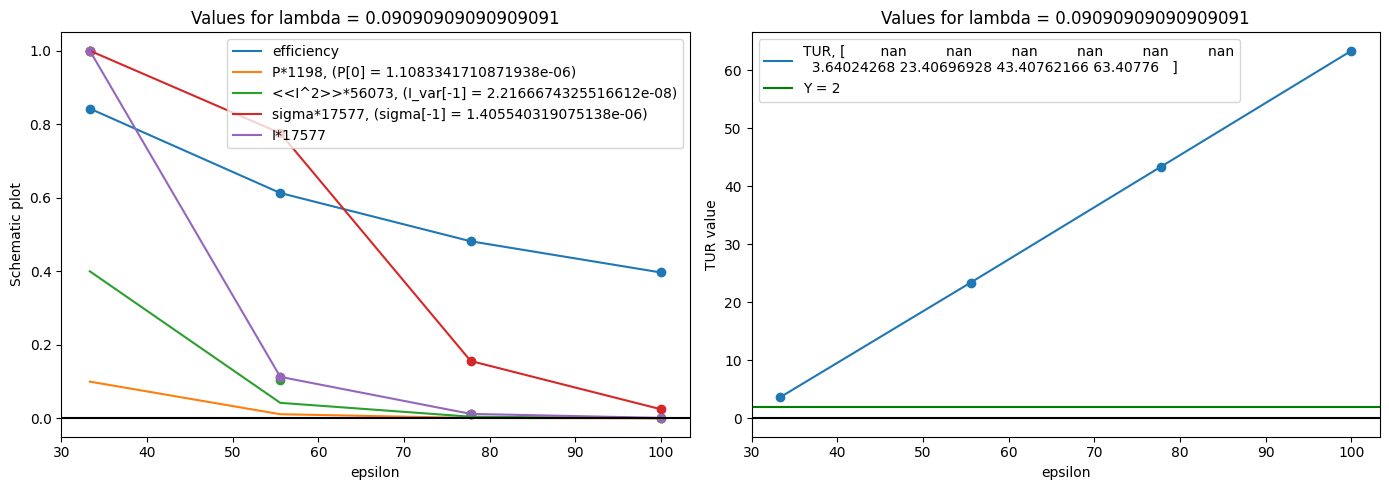

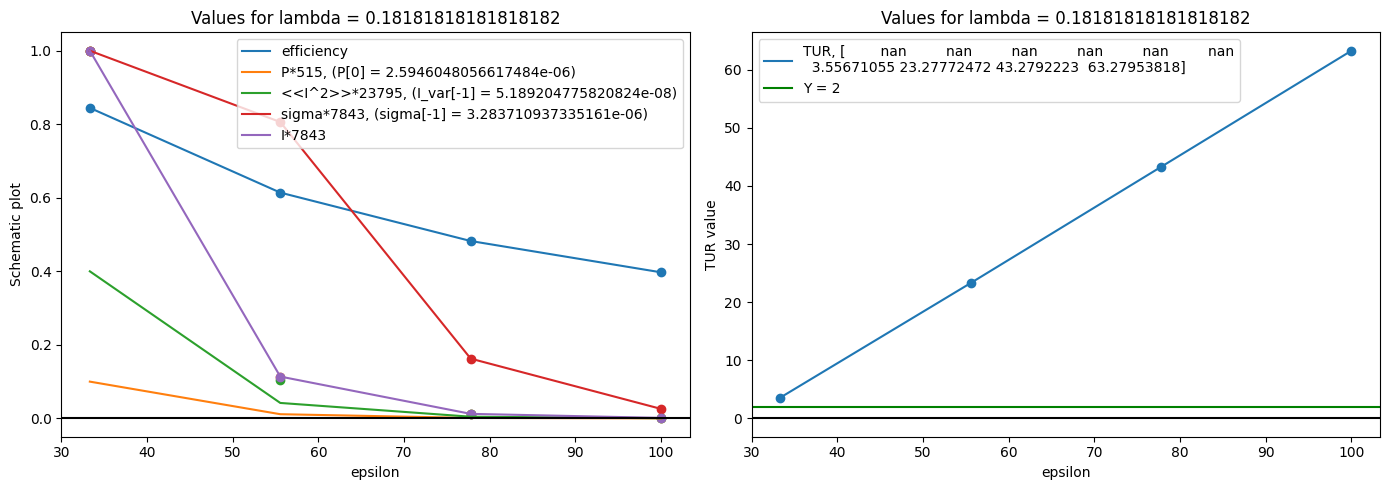

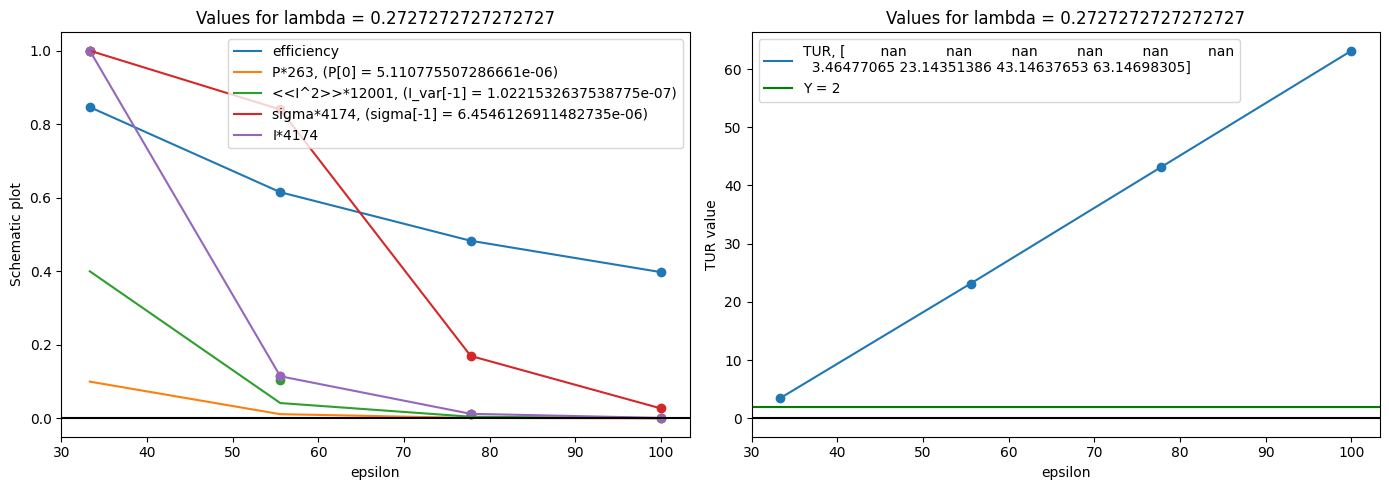

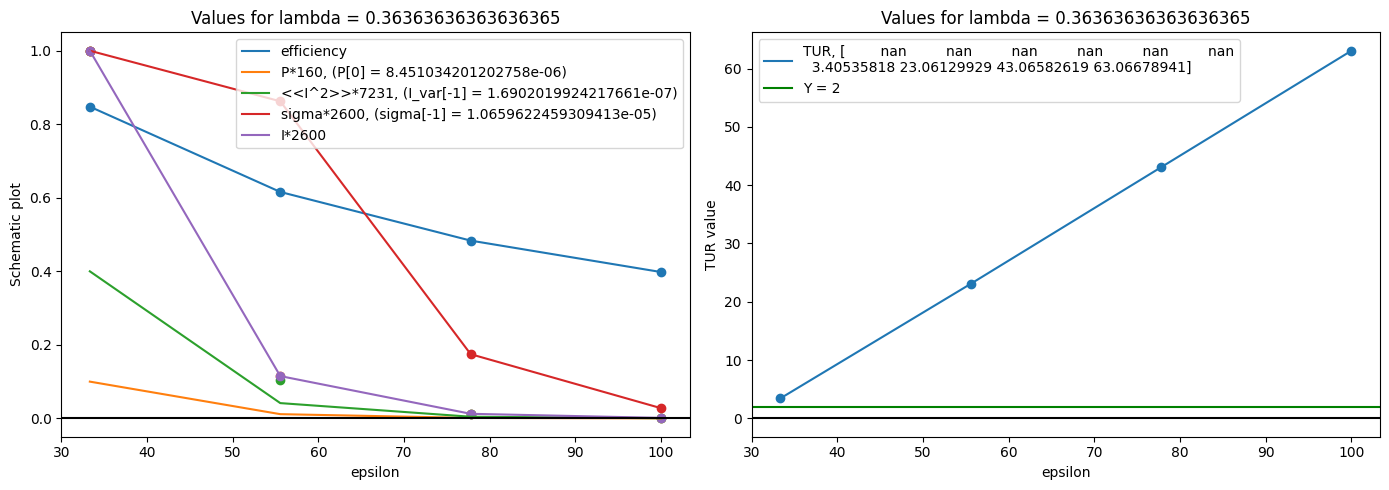

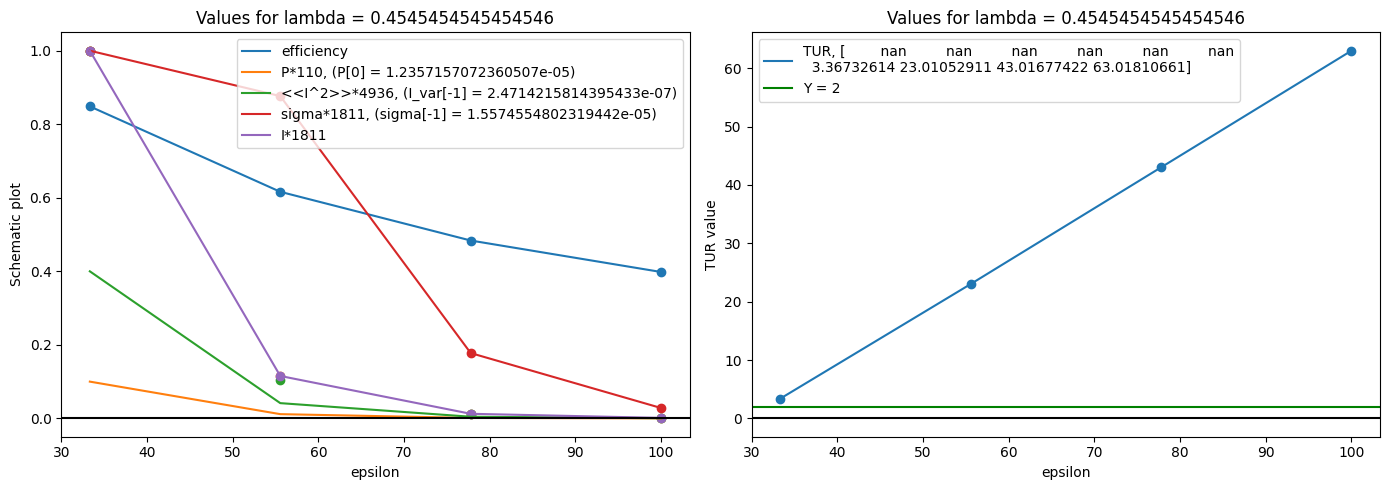

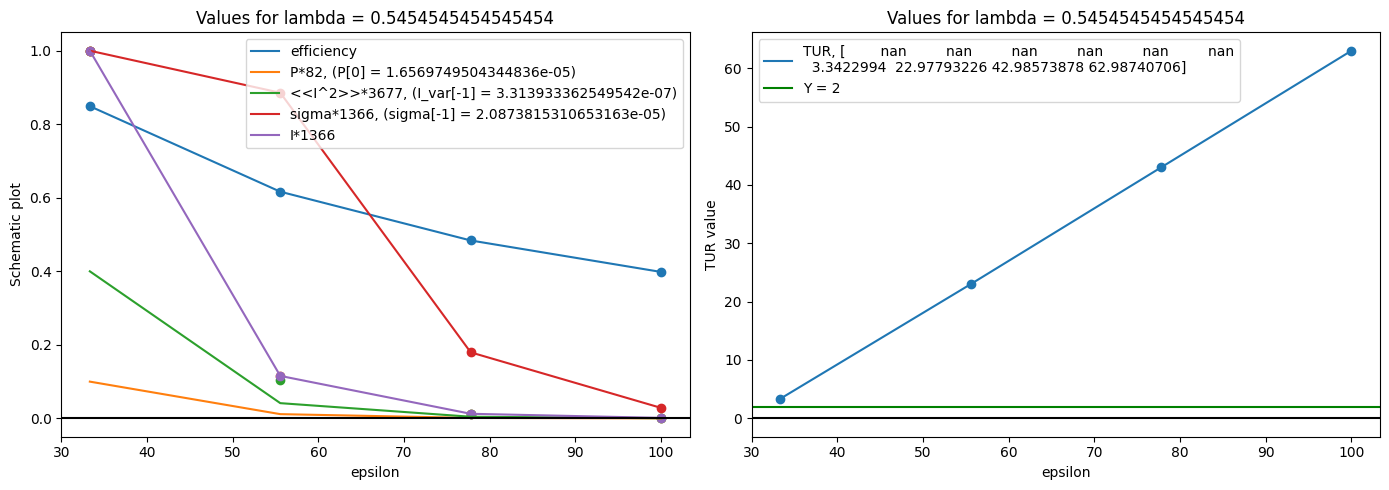

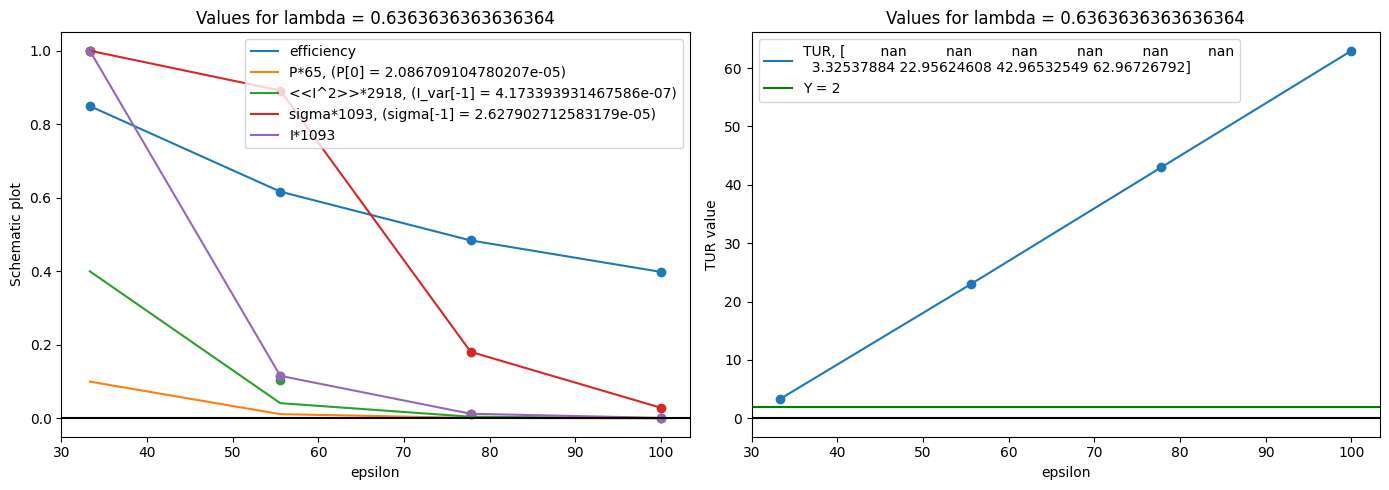

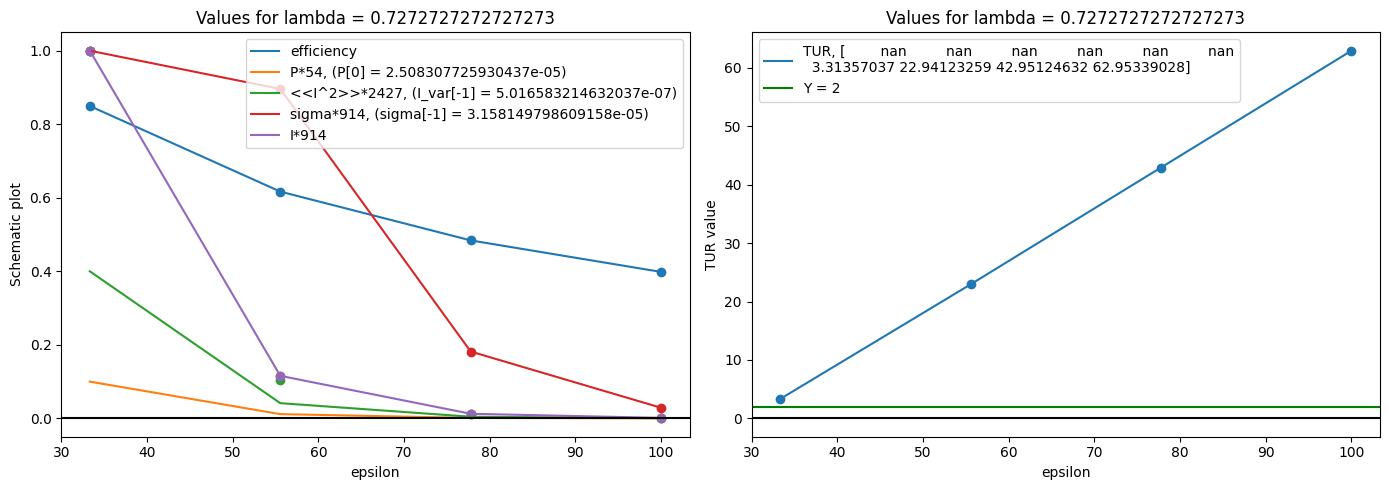

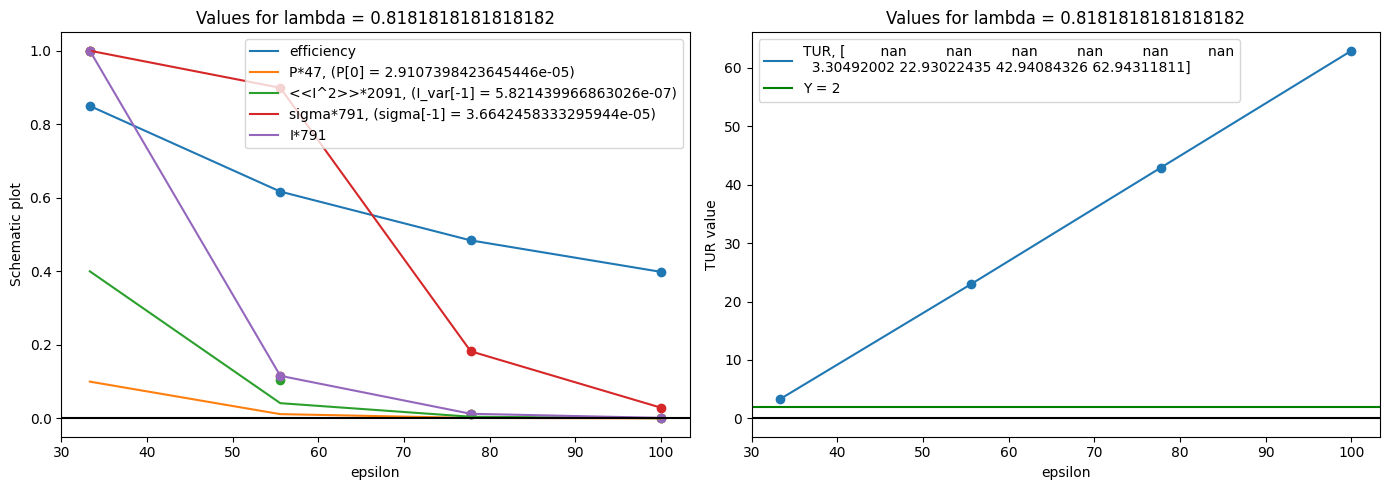

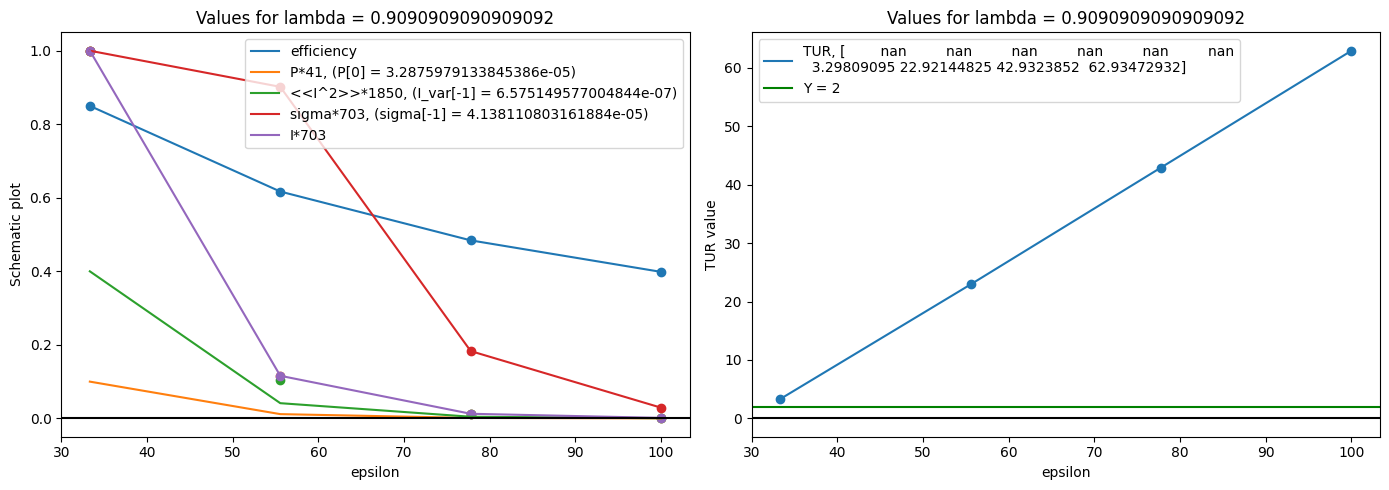

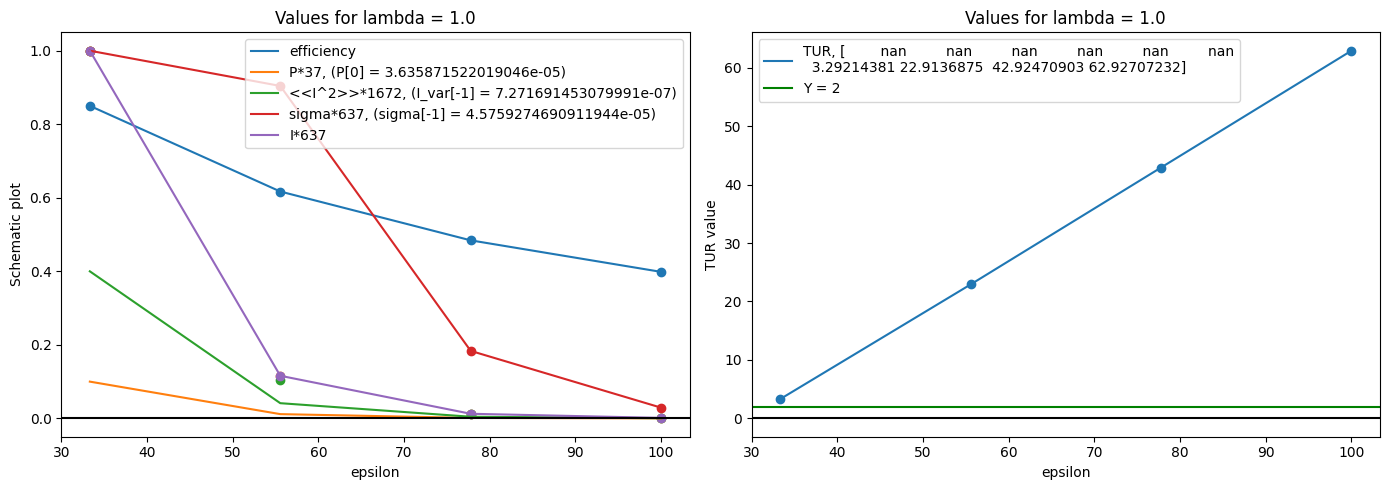

In [ ]:
#---------plotting----------------------------------
for idx, lmda in enumerate(lamdas):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) 

    def get_mult(matrix):
        max = 0
        for e_idx, _ in enumerate(epsilons):
            if matrix[idx, e_idx] > max:
                max = matrix[idx, e_idx]
        return 1/max 


    ax1.plot(epsilons, eff[idx], label='efficiency')
    ax1.scatter(epsilons, eff[idx])
    ax1.plot(epsilons, 0.1*get_mult(P)*P[idx], label=f'P*{round(get_mult(P))}, (P[0] = {P[idx][-1]})')
    ax1.scatter(epsilons, get_mult(P)*P[idx])
    ax1.plot(epsilons, 0.4*get_mult(I_var)*I_var[idx], label=f'<<I^2>>*{round(get_mult(I_var))}, (I_var[-1] = {I_var[idx][-1]})')
    ax1.scatter(epsilons, get_mult(I_var)*I_var[idx])
    ax1.plot(epsilons, get_mult(sigma)*sigma[idx], label=f'sigma*{round(get_mult(sigma))}, (sigma[-1] = {sigma[idx][-1]})')
    ax1.scatter(epsilons, get_mult(sigma)*sigma[idx])
    ax1.plot(epsilons, get_mult(I)*I[idx], label=f'I*{round(get_mult(sigma))}')
    ax1.scatter(epsilons, get_mult(I)*I[idx])
    
    #ax1.scatter(epsilons, J_QH[idx], label=f'J_QH, 0: {J_QH[idx][0]}, 1: {J_QH[idx][1]}, 2: {J_QH[idx][2]} , 3: {J_QH[idx][3]}, 4: {J_QH[idx][4]}, 5: {J_QH[idx][5]}, 6: {J_QH[idx][6]}')
    ax1.axhline(y=0, color='black', linestyle='-')
    #ax1.set_ylim(-0.01, 0.01)
    ax1.set_xlabel('epsilon')
    ax1.set_ylabel('Schematic plot')
    ax1.set_title(f'Values for lambda = {lmda}')
    ax1.legend()

    ax2.plot(epsilons, TUR[idx], label=f'TUR, {TUR[idx]}')
    ax2.scatter(epsilons, TUR[idx])
    ax2.set_title(f'Values for lambda = {lmda}')
    ax2.axhline(y=2, color='g', linestyle='-', label= 'Y = 2')
    ax2.axhline(y=0, color='black', linestyle='-')
    ax2.set_xlabel('epsilon')
    ax2.set_ylabel('TUR value')
    ax2.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

I: (12, 10)
meshgrid:
epsilon: (12, 10)
lamda: (12, 10)


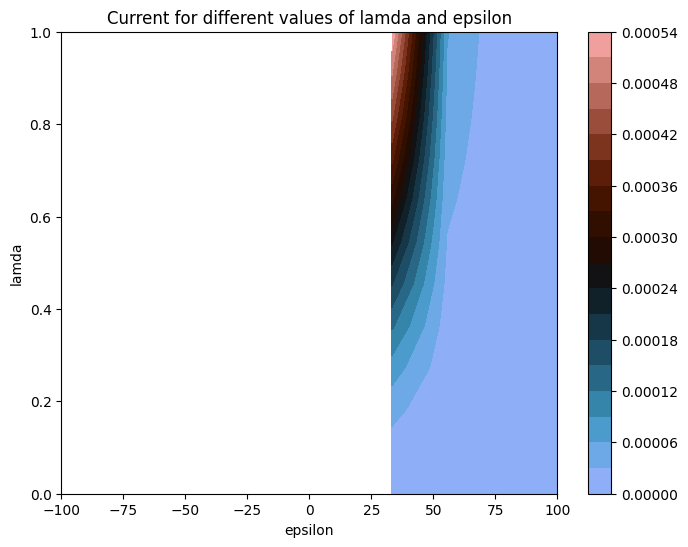

In [ ]:
# Plotting of the cummulants

# Create a mesh grid
epsilon, lamda = np.meshgrid(epsilons, lamdas)
print('I:',I.shape)
print('meshgrid:')
print('epsilon:', epsilon.shape)
print('lamda:', lamda.shape)

plt.figure(figsize=(8, 6))
# Create a contour plot (or a pcolormesh plot for a smooth color gradient)
contour = plt.contourf(epsilon, lamda, I, 20, cmap='berlin')  # Adjust number of contour levels as needed
#contour = plt.pcolormesh(epsilon, lamda, I, shading='auto', cmap='viridis')
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('lamda')
plt.title('Current for different values of lamda and epsilon')
plt.show()